# Classify the YouTube Comments

### Using the datasets from https://archive.ics.uci.edu/dataset/380/youtube+spam+collection

In the digital age, YouTube has become an integral part of our daily lives, offering a vast array of content ranging from educational tutorials to entertaining vlogs. However, with the exponential growth of user-generated content, ensuring a safe and enjoyable environment for users has become a paramount concern. The YouTube Comment Classifier project aims to tackle this challenge by developing an intelligent system capable of effectively classifying comments based on their content and sentiment.

The project involves building a machine learning model that can analyze and categorize comments posted on YouTube videos into different classes such as positive, negative, neutral, spam, offensive, or irrelevant. By harnessing the power of natural language processing (NLP) techniques and sentiment analysis algorithms, the classifier will be able to identify and flag inappropriate or harmful comments in real-time.

##### Key Features and Functionalities:

- Data Collection and Preprocessing: The project begins with collecting a diverse dataset of YouTube comments across various channels and categories. The comments are then preprocessed to remove noise, stopwords, and special characters, and tokenized for further analysis.
    
 - Feature Extraction: Next, relevant features are extracted from the preprocessed text data using techniques like TF-IDF (Term Frequency-Inverse Document Frequency) or word embeddings. These features capture the semantic meaning and context of the comments, enabling the model to make accurate predictions.
    
- Model Training and Evaluation: Multiple machine learning algorithms such as Support Vector Machines (SVM), Naive Bayes, or deep learning architectures like recurrent neural networks (RNNs) or transformer-based models (e.g., BERT) are trained on the labeled dataset. The models are evaluated using metrics like accuracy, precision, recall, and F1-score to assess their performance.

#### Importing required packages

In [1]:
import pandas as pd
import numpy as np
import pickle

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the Datasets

The data is lodaded form the local drive. It can be downloaded from the provided link above as a zip file.

In [2]:
psy = pd.read_csv("Youtube01-Psy.csv")
katy = pd.read_csv("Youtube02-KatyPerry.csv")
lmfao = pd.read_csv("Youtube03-LMFAO.csv")
eminem = pd.read_csv("Youtube04-Eminem.csv")
shakira = pd.read_csv("Youtube05-Shakira.csv")

Showing first five rows of the sample data (e.g. Shakira)

In [3]:
shakira.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13lgffb5w3ddx1ul22qy1wxspy5cpkz504,dharma pal,2015-05-29T02:30:18.971000,Nice song﻿,0
1,z123dbgb0mqjfxbtz22ucjc5jvzcv3ykj,Tiza Arellano,2015-05-29T00:14:48.748000,I love song ﻿,0
2,z12quxxp2vutflkxv04cihggzt2azl34pms0k,Prìñçeśś Âliś Łøvê Dømíñø Mâđiś™ ﻿,2015-05-28T21:00:08.607000,I love song ﻿,0
3,z12icv3ysqvlwth2c23eddlykyqut5z1h,Eric Gonzalez,2015-05-28T20:47:12.193000,"860,000,000 lets make it first female to reach...",0
4,z133stly3kete3tly22petvwdpmghrlli,Analena López,2015-05-28T17:08:29.827000,shakira is best for worldcup﻿,0



All the loaded data is combined into a single variable using the concat attribute from the pandas package.

In [4]:
df = pd.concat([psy, katy, lmfao, eminem, shakira])

We'll exclude the columns that are irrelevant to our analysis, namely COMMENT_ID, AUTHOR, and DATE from this dataset.

In [5]:
df.drop(["COMMENT_ID", "AUTHOR", "DATE"], axis = 1, inplace = True)

In [6]:
df.head()

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1


The final dataset obtained after processing comprises two key features. The first feature, denoted as "content," represents the comments provided by users. The content feature serves as the primary textual input for our analysis, encapsulating the text-based information contained within each comment.

The second feature, labeled as "class," categorizes the comments into two distinct classes: "Positive" and "Negative." This binary classification scheme assigns each comment to one of these two categories based on its sentiment or content characteristics.


Then we split the datasets into train and test and fit our model with the train data. 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df["CONTENT"], df["CLASS"])

We use TfidfVectorizer which is a tool used in the scikit-learn library, primarily for text processing and feature extraction in natural language processing (NLP) tasks. Here's why it's used:

- TF-IDF Representation: The name TfidfVectorizer stands for Term Frequency-Inverse Document Frequency Vectorizer. It converts a collection of raw documents into a matrix of TF-IDF features. TF-IDF reflects the importance of a word in a document relative to a collection of documents. It's a statistical measure used to evaluate how relevant a word is to a document in a collection.
- Normalization: It helps in normalizing the data. TF-IDF weights the term frequency by the inverse of its document frequency. This ensures that commonly occurring words across documents have lower weights, while words that are more unique to a document have higher weights.
- Dimensionality Reduction: In text processing, the vocabulary size can be very large, resulting in high-dimensional feature spaces. TF-IDF helps in reducing this dimensionality while preserving the important information. By representing documents in a TF-IDF space, you're effectively focusing on the most meaningful terms while downplaying the less informative ones.
- Preprocessing: TfidfVectorizer in scikit-learn offers various preprocessing options such as tokenization, stop word removal, and filtering of terms based on frequency. These options allow customization according to the specific requirements of the NLP task.
- Compatibility with ML Algorithms: Once the text data is converted into TF-IDF features, it can be readily used with various machine learning algorithms available in scikit-learn, such as classifiers (e.g., SVM, Naive Bayes), clustering algorithms, and regression models.

In [8]:
tfidf_vect = TfidfVectorizer(use_idf = True, lowercase = True)

In [9]:
X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_train_tfidf.shape

(1467, 3655)

Now we create the model and fit with the training data.

In [10]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [11]:
X_test_tfidf = tfidf_vect.transform(X_test)
predictions = model.predict(X_test_tfidf)

In [12]:
predictions

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,

#### Model Evaluation

In [13]:
cm = confusion_matrix(y_test, predictions)

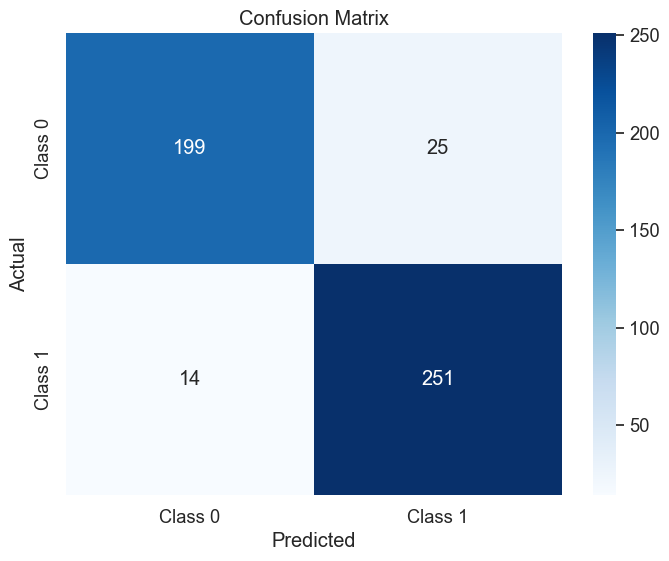

In [14]:
# Replace these with your actual class labels
classes = ['Class 0', 'Class 1']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size if necessary
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)

# Add labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(ticks=np.arange(len(classes)) + 0.5, labels=classes)
plt.yticks(ticks=np.arange(len(classes)) + 0.5, labels=classes)
plt.show()

In [15]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       224
           1       0.91      0.95      0.93       265

    accuracy                           0.92       489
   macro avg       0.92      0.92      0.92       489
weighted avg       0.92      0.92      0.92       489



In [16]:
model.score(X_test_tfidf, y_test)

0.9202453987730062

#### Dump the model in local drive for further uses

In [17]:
with open("model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

In [18]:
with open("tfidf-vect.pkl", "wb") as tfidf_vect_file:
    pickle.dump(tfidf_vect, tfidf_vect_file)